mean =  5.843333333333334
standard deviation =  0.8253012917851409
Scatter plot and correlation Matrix :


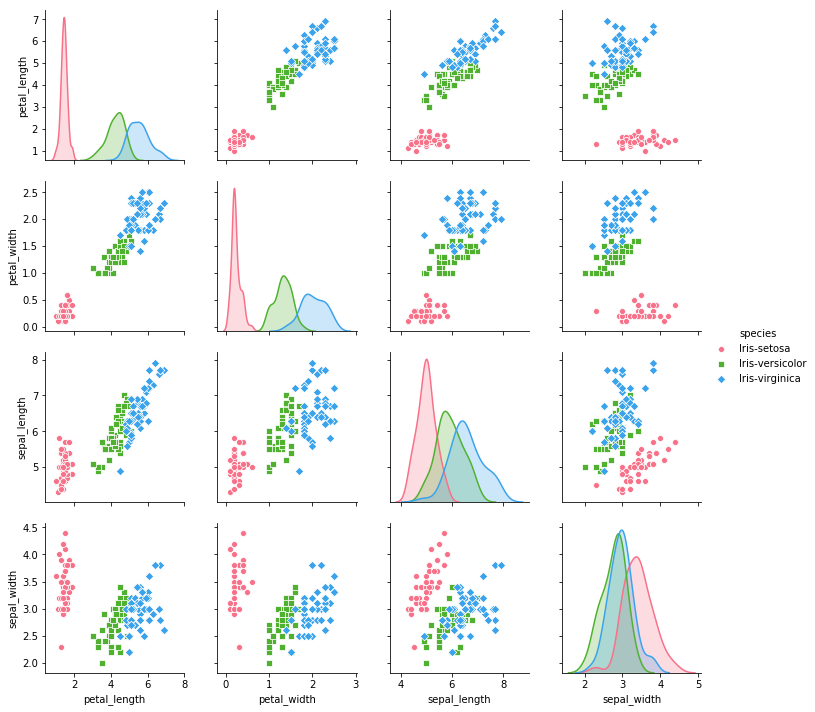

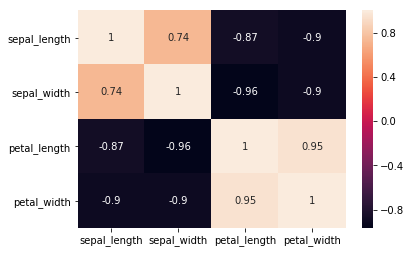

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

input_file="./iris.csv"

slength=[]
swidth=[]
plength=[]
pwidth=[]
iristype=[]

with open(input_file, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i in spamreader:
        if len(i)>0:
            slength+=[i[0]]
            swidth+=[i[1]]
            plength+=[i[2]]
            pwidth+=[i[3]]
            iristype+=[i[4]]

#Data preprocessing
slength=np.array(slength).astype(np.float)
swidth=np.array(swidth).astype(np.float)
plength=np.array(plength).astype(np.float)
pwidth=np.array(pwidth).astype(np.float)

print("mean = ",np.mean(np.array(slength)))
print("standard deviation = ",np.std(slength))
#draw scatter plot matrix
iris={
    "sepal_length":slength,
    "sepal_width":swidth,
    "petal_length":plength,
    "petal_width":pwidth,
    "species":iristype
}
iris=pd.DataFrame(iris)
sns.pairplot(iris, hue="species", palette="husl",markers=["o", "s", "D"])
plt.figure()

#Map key to number and select feature and target
species={
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}
iris["species"]=iris["species"].map(species)
feature_name=['sepal_length','sepal_width','petal_length','petal_width']
target=iris['species']

feature=np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"],iris["petal_width"]])
feature_normalized = pd.DataFrame(preprocessing.normalize(feature))
#Correlation Matrix
corr = feature_normalized.corr()
print("Scatter plot and correlation Matrix :")
sns.heatmap(corr, 
            xticklabels=feature_name,
            yticklabels=feature_name,annot=True)

In [3]:
#split data into training and testing data(Holdout CV)
print("after = ",np.shape(feature))
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3)
# print(x_train)

after =  (150, 4)


In [4]:
#Building decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [13]:
#predict result and actual result
from sklearn.metrics import classification_report
print("predict result :")
print(tree.predict(x_test))
print("actual result :")
print(y_test.values)
#Accuracy
print(tree.score(x_test,y_test.values))
print(classification_report(y_test.values,tree.predict(x_test),target_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]))

predict result :
[1 0 0 0 1 2 0 1 1 2 2 0 1 0 0 2 2 0 2 1 1 2 1 0 1 1 1 0 2 2 1 2 0 2 2 0 1
 0 0 0 0 0 2 1 1]
actual result :
[1 0 0 0 1 2 0 1 1 1 2 0 1 0 0 2 2 0 2 1 1 2 1 0 1 1 1 0 2 2 1 2 0 2 2 0 1
 0 0 0 0 0 2 1 1]
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        12

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [52]:
#Draw decision tree by using graphviz(should use terminal to change into .png)
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=feature_name)

In [8]:
#Random forest(5 is all feature for testing)
x1_train, x1_test, y1_train, y1_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"]]), iris["species"], test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"], iris["petal_width"]]), iris["species"], test_size=0.3)
x3_train, x3_test, y3_train, y3_test = train_test_split(np.transpose([iris["sepal_length"],iris["petal_length"], iris["petal_width"]]), iris["species"],test_size=0.3)
x4_train, x4_test, y4_train, y4_test = train_test_split(np.transpose([iris["sepal_width"],iris["petal_length"], iris["petal_width"]]), iris["species"], test_size=0.3)
x5_train, x5_test, y5_train, y5_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"],iris["petal_width"]]), iris["species"], test_size=0.3)

tree1_split_7_3 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree2_split_7_3 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree3_split_7_3 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree4_split_7_3 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree1_split_7_3.fit(x1_train,y1_train)
tree2_split_7_3.fit(x2_train,y2_train)
tree3_split_7_3.fit(x3_train,y3_train)
tree4_split_7_3.fit(x4_train,y4_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [9]:
#Random forest cont.
A = x5_test[:,0:3]
# print("A=",A)
B = x5_test[:,[0,1,3]]
#print(B)
C = x5_test[:,[0,2,3]]
D = x5_test[:,1:4]
print(tree1_split_7_3.predict(A))
print(y5_test.values)
tree1_split_7_3.score(A,y5_test.values)

print(tree2_split_7_3.predict(B))
print(y5_test.values)
tree2_split_7_3.score(B,y5_test.values)

print(tree3_split_7_3.predict(C))
print(y5_test.values)
tree3_split_7_3.score(C,y5_test.values)

print(tree4_split_7_3.predict(D))
print(y5_test.values)
tree4_split_7_3.score(D,y5_test.values)

print(tree1_split_7_3.predict(A)[:])

[2 1 1 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 2 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 2 2 0 0 2 2 0 0 1 0 0 0 0 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 2 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 2 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 2 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 2 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 2 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 2 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]
[2 1 1 2 0 0 2 2 0 0 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 1 2
 2 2 1 1 2 1 2 1]


In [10]:
#Random forest cont.
result_split_7_3 = np.zeros(len(y5_test.values))
for i in range(len(y5_test.values)):
    count = [0,0,0]
    if tree1_split_7_3.predict(A)[i] == 2: 
        count[2]+=1
    if tree2_split_7_3.predict(B)[i] == 2: 
        count[2]+=1
    if tree3_split_7_3.predict(C)[i] == 2: 
        count[2]+=1
    if tree4_split_7_3.predict(D)[i] == 2: 
        count[2]+=1
    if tree1_split_7_3.predict(A)[i] == 1: 
        count[1]+=1
    if tree2_split_7_3.predict(B)[i] == 1: 
        count[1]+=1
    if tree3_split_7_3.predict(C)[i] == 1: 
        count[1]+=1
    if tree4_split_7_3.predict(D)[i] == 1: 
        count[1]+=1
    if tree1_split_7_3.predict(A)[i] == 0: 
        count[0]+=1
    if tree2_split_7_3.predict(B)[i] == 0: 
        count[0]+=1
    if tree3_split_7_3.predict(C)[i] == 0: 
        count[0]+=1
    if tree4_split_7_3.predict(D)[i] == 0: 
        count[0]+=1
    
    max_num = 0
    
    for j in range(3):
        if count[j] >= max_num:
            max_num = count[j]
            result_split_7_3[i] = j
            
#checking result
result_split_7_3

array([2., 1., 2., 2., 0., 0., 2., 2., 0., 0., 1., 0., 0., 0., 0., 1., 2.,
       1., 1., 1., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1.])

7:3 decision tree auc : 100.0%
Holdout 7:3 Random Forest Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        15

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Holdout 7:3 Random Forest Confusion Matrix :


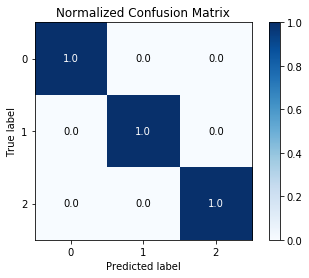

In [12]:
#comfusion matrix,precision,recall,total accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scikitplot as skplt

#check random forest accuracy
counter = 0
for index in range(len(result_split_7_3)):
    if result_split_7_3[index] == y5_test.values[index]:
        counter+=1
        
accurancy = counter / len(result_split_7_3)
print("7:3 decision tree auc : " + str(accurancy*100) + "%")

print("Holdout 7:3 Random Forest Report :")
print(classification_report(y5_test.values,result_split_7_3,target_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]))
#Total k-fold decision tree confusion matrix
print("Holdout 7:3 Random Forest Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(y5_test.values,result_split_7_3, normalize=True)
plt.show()

iteration =  1
iteration =  2
iteration =  3
iteration =  4
iteration =  5
iteration =  6
iteration =  7
iteration =  8
iteration =  9
iteration =  10
K-Fold Decision Tree Confusion Matrix :


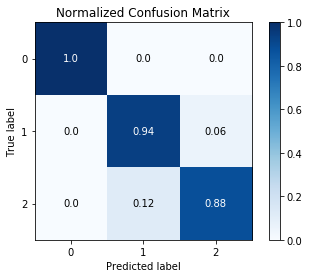

K-Fold Decision Tree Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.89      0.94      0.91        50
 Iris-virginica       0.94      0.88      0.91        50

      micro avg       0.94      0.94      0.94       150
      macro avg       0.94      0.94      0.94       150
   weighted avg       0.94      0.94      0.94       150



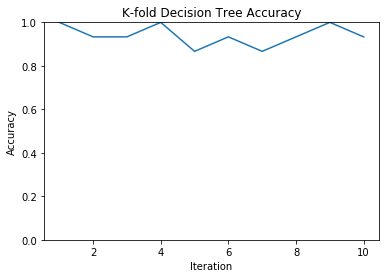

In [57]:
#K-fold cross validation + decision tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
import scikitplot as skplt
import numpy as np

iris_transpose=np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"],iris["petal_width"]])
i=0

all_feature_train, all_feature_test, all_label_train, all_label_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"],iris["petal_width"]]), iris["species"], test_size=0.0)

k_fold_result = []
for j in range(10):
    k_fold_result.append(np.zeros(len(all_label_train.values)))
# print(np.shape(k_fold_result))

k_fold_target_predict=[]
k_fold_target_actual=[]
k_fold_score=[]

k_fold_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
kf = StratifiedKFold(n_splits=10,shuffle=True)

for train_index,test_index in kf.split(iris_transpose,iris["species"]):
    print("iteration = ",i+1)
    k_fold_feature_train, k_fold_feature_test = iris_transpose[train_index], iris_transpose[test_index]
    k_fold_label_train,  k_fold_label_test = iris["species"][train_index], iris["species"][test_index]
    
    k_fold_tree.fit(k_fold_feature_train, k_fold_label_train)
    k_fold_tree_y_predict=k_fold_tree.predict(k_fold_feature_test)
    k_fold_target_predict.append(k_fold_tree_y_predict)
    k_fold_target_actual.append(k_fold_label_test)

    #result for decision tree
    scores=k_fold_tree.score(k_fold_feature_test,k_fold_label_test.values)
    k_fold_score.append(scores)
    
    #for random forest
    k_fold_result[i] = k_fold_tree.predict(all_feature_train)
    i+=1

    
k_fold_target_predict=np.array(k_fold_target_predict)
k_fold_target_predict=k_fold_target_predict.reshape(1,150)
k_fold_target_actual=np.array(k_fold_target_actual)
k_fold_target_actual=k_fold_target_actual.reshape(1,150)

#Total k-fold decision tree confusion matrix
print("K-Fold Decision Tree Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(k_fold_target_actual[0],k_fold_target_predict[0], normalize=True)
plt.show()
    
#total k-fold decision tree classification report
print("K-Fold Decision Tree Report :")
print(classification_report(k_fold_target_actual[0],k_fold_target_predict[0],target_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]))

#Total k-fold decision tree score
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("K-fold Decision Tree Accuracy")
plt.ylim(0,1.0)
plt.plot(range(1,11),k_fold_score)
plt.show()

K-Fold Random Forest Accuracy : 99.33333333333333%
K-Fold Random Forest Confusion Matrix :


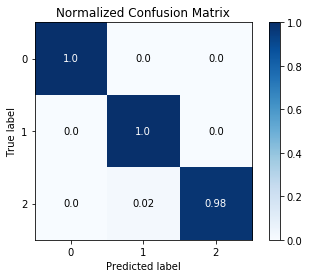

K-Fold Random Forest Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      1.00      0.99        50
 Iris-virginica       1.00      0.98      0.99        50

      micro avg       0.99      0.99      0.99       150
      macro avg       0.99      0.99      0.99       150
   weighted avg       0.99      0.99      0.99       150



In [65]:
#K-fold cross validation + random forest 
k_fold_total_result = np.zeros(150)
# print(np.shape(k_fold_result))

for i in range(150):
    for j in range(10):
        count = [0,0,0]
        if k_fold_result[j][i] == 2: 
            count[2]+=1
        if k_fold_result[j][i] == 1: 
            count[1]+=1
        if k_fold_result[j][i] == 0: 
            count[0]+=1 
    max_num = 0
    for x in range(3):
        if count[x] >= max_num:
            max_num = count[x]
            k_fold_total_result[i] = x

#check random forest accuracy
counter = 0
for index in range(len(k_fold_total_result)):
    if k_fold_total_result[index] == all_label_train.values[index]:
        counter+=1
        
accurancy = counter / len(k_fold_total_result)
print("K-Fold Random Forest Accuracy : " +str(accurancy*100) + "%")

#k fold validation + random forest + confusion matrix
#confusion matrix,precision,recall
print("K-Fold Random Forest Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(all_label_train.values,k_fold_total_result, normalize=True)
plt.show()
print("K-Fold Random Forest Report :")
print(classification_report(all_label_train.values,k_fold_total_result,target_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]))

In [59]:
#resubstitution validation + decisiontree
total_train, total_test, result_train, result_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"],iris["petal_width"]]), iris["species"], test_size=0.0)
#print(total_train)
#print(len(total_train))
resubstitution_decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

resubstitution_decision_tree.fit(total_train,result_train)
#print(resubstitution_decision_tree.predict(total_train))


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Resubstitution Decision Tree Score :
1.0
Resubstitution Decision Tree Confusion Matrix :


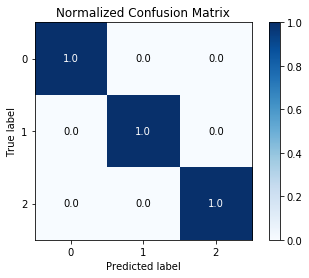

Resubstitution Decision Tree Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

      micro avg       1.00      1.00      1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150



In [60]:
#resubstitution validation score + decisiontree + confusion matrix
#score,confusion matrix,precision,recall
print("Resubstitution Decision Tree Score :")
print(resubstitution_decision_tree.score(total_train,result_train.values))

print("Resubstitution Decision Tree Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(result_train.values,resubstitution_decision_tree.predict(total_train), normalize=True)
plt.show()

print("Resubstitution Decision Tree Report :")
print(classification_report(result_train.values,resubstitution_decision_tree.predict(total_train),target_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]))

In [61]:
#resubstitution validation + randomforest
#Random forest(5 is all feature for testing)
feature1_train, feature1_test, label1_train, label1_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"]]), iris["species"], test_size=0.0)
feature2_train, feature2_test, label2_train, label2_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"], iris["petal_width"]]), iris["species"], test_size=0.0)
feature3_train, feature3_test, label3_train, label3_test = train_test_split(np.transpose([iris["sepal_length"],iris["petal_length"], iris["petal_width"]]), iris["species"],test_size=0.0)
feature4_train, feature4_test, label4_train, label4_test = train_test_split(np.transpose([iris["sepal_width"],iris["petal_length"], iris["petal_width"]]), iris["species"], test_size=0.0)
feature5_train, feature5_test, label5_train, label5_test = train_test_split(np.transpose([iris["sepal_length"],iris["sepal_width"],iris["petal_length"],iris["petal_width"]]), iris["species"], test_size=0.0)

tree1_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree2_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree3_resubstitution= DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree4_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree1_resubstitution.fit(feature1_train,label1_train)
tree2_resubstitution.fit(feature2_train,label2_train)
tree3_resubstitution.fit(feature3_train,label3_train)
tree4_resubstitution.fit(feature4_train,label4_train)
#Random forest cont.
A = feature5_train[:,0:3]
# print("A=",A)
B = feature5_train[:,[0,1,3]]
#print(B)
C = feature5_train[:,[0,2,3]]
D = feature5_train[:,1:4]
#print(tree1.predict(A))
#print(label5_train.values)
print("tree1 auc:  "+ str(tree1_resubstitution.score(A,label5_train.values)))

#print(tree2.predict(B))
#print(label5_train.values)
print("tree2 auc:  "+ str(tree2_resubstitution.score(B,label5_train.values)))

#print(tree3.predict(C))
#print(label5_train.values)
print("tree3 auc:  "+ str(tree3_resubstitution.score(C,label5_train.values)))

#print(tree4.predict(D))
#print(label5_test.values)
print("tree1 auc:  "+ str(tree4_resubstitution.score(D,label5_train.values)))

tree1 auc:  1.0
tree2 auc:  1.0
tree3 auc:  1.0
tree1 auc:  1.0


In [62]:

#print(tree1.predict(A)[:])
#Random forest cont.
result = np.zeros(len(label5_train.values))
for i in range(len(label5_train.values)):
    count = [0,0,0]
    if tree1_resubstitution.predict(A)[i] == 2: 
        count[2]+=1
    if tree2_resubstitution.predict(B)[i] == 2: 
        count[2]+=1
    if tree3_resubstitution.predict(C)[i] == 2: 
        count[2]+=1
    if tree4_resubstitution.predict(D)[i] == 2: 
        count[2]+=1
    if tree1_resubstitution.predict(A)[i] == 1: 
        count[1]+=1
    if tree2_resubstitution.predict(B)[i] == 1: 
        count[1]+=1
    if tree3_resubstitution.predict(C)[i] == 1: 
        count[1]+=1
    if tree4_resubstitution.predict(D)[i] == 1: 
        count[1]+=1
    if tree1_resubstitution.predict(A)[i] == 0: 
        count[0]+=1
    if tree2_resubstitution.predict(B)[i] == 0: 
        count[0]+=1
    if tree3_resubstitution.predict(C)[i] == 0: 
        count[0]+=1
    if tree4_resubstitution.predict(D)[i] == 0: 
        count[0]+=1
    
    max_num = 0
    
    for j in range(3):
        if count[j] >= max_num:
            max_num = count[j]
            result[i] = j
            
            
#check random forest accuracy
counter = 0
for index in range(len(result)):
    if result[index] == label5_train.values[index]:
        counter+=1
        
accurancy = counter / len(result)
print("resubtitution random forest auc : " +str(accurancy*100) + "%")

resubtitution random forest auc : 100.0%


Resubtitution Random Forest Accuracy : 100.0%
Resubstitution Random Forest Confusion Matrix :


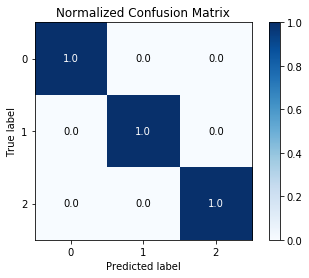

Resubstitution Random Forest Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

      micro avg       1.00      1.00      1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150



In [63]:
#resubstitution validation + forest + accuracy + confusion matrix
accurancy = counter / len(result)
print("Resubtitution Random Forest Accuracy : " +str(accurancy*100) + "%")

#confusion matrix,precision,recall
print("Resubstitution Random Forest Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(label5_train.values,result, normalize=True)
plt.show()

print("Resubstitution Random Forest Report :")
print(classification_report(label5_train.values,result,target_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]))